In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib import dates as mdates

In [2]:
# Get the daily stock price dataset

dataset_d = pd.read_csv("..\data\BA daily.csv")
print("Number of entries in dataset_d: {}.".format(len(dataset_d)))
dataset_d.head()

Number of entries in dataset_d: 9424.


Date      Open      High       Low     Close  Adj Close   Volume
0  1/2/1985  8.370370  8.370370  8.037037  8.037037   3.840493  1906875
1  1/3/1985  8.055556  8.222222  8.055556  8.092593   3.867044  3354750
2  1/4/1985  8.092593  8.148148  8.074074  8.129630   3.884740  1251450
3  1/7/1985  8.129630  8.222222  8.111111  8.185185   3.911288  1257525
4  1/8/1985  8.166667  8.166667  8.129630  8.148148   3.893589  1015875

In [3]:
# Convert date and time columns into datetime format

dataset_d.set_index(pd.to_datetime(dataset_d["Date"], format="%m/%d/%Y"), inplace = True)
dataset_d.drop(columns = ["Date"], inplace = True)
dataset_d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9424 entries, 1985-01-02 to 2022-05-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9424 non-null   float64
 1   High       9424 non-null   float64
 2   Low        9424 non-null   float64
 3   Close      9424 non-null   float64
 4   Adj Close  9424 non-null   float64
 5   Volume     9424 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 515.4 KB


In [4]:
# Time period of the stock price available

period_d = dataset_d.index[-1] - dataset_d.index[0]
print("The period of available stock price history is: {} days.".format(period_d.days))
prices = ["Open", "High", "Low", "Close"]
colors = ['#BD9DEA', '#EA7186', '#F2C76E', '#7A77B9']

The period of available stock price history is: 13652 days.


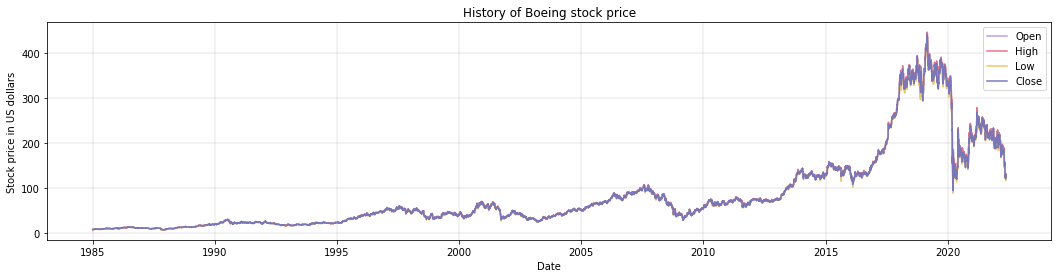

In [5]:
plt.figure(figsize = (18, 4))
plt.title("History of Boeing stock price")
for price, color in zip(prices, colors):
    plt.plot(dataset_d.index, dataset_d[price], color = color)
plt.xlabel("Date")
plt.ylabel("Stock price in US dollars")
plt.legend(prices)
plt.grid(linewidth = 0.1, color = "#000000")
plt.show()

In [6]:
# Create graphs for annual stock price changes

def annual_graph(dataset, start_date = "start", end_date = "end"):
    if start_date == "start" and end_date == "end":
        dataset = dataset
    elif start_date == "start":
        dataset = dataset[dataset.index < pd.Timestamp(end_date)]
    elif end_date == "end":
        dataset = dataset[dataset.index > pd.Timestamp(start_date)]
    else:
        dataset = dataset[(dataset.index > pd.Timestamp(start_date)) & (dataset.index < pd.Timestamp(end_date))]
    n_m = len(dataset.groupby([dataset.index.year]))
    range_start = 0
    i_m = 0
    fig, axes = plt.subplots(n_m , 1, figsize = (18, 4 * n_m))
    fig.subplots_adjust(hspace = 0.4)
    for i in range(len(dataset)):
        if i == 0:
            continue
        elif dataset.index.year[i] != dataset.index.year[i-1]:
            for price, color in zip(prices, colors):
                axes[i_m].plot(dataset.index[range_start : i - 1], dataset[price][range_start : i - 1], color = color)
            axes[i_m].set_title('Year ' + str(dataset.index[i-1].year))
            axes[i_m].grid(linewidth = 0.1, color = "#000000")
            axes[i_m].legend(prices)
            range_start = i
            i_m += 1
        elif i == len(dataset) - 1:
            for (price, color) in zip(prices, colors):
                axes[i_m].plot(dataset.index[range_start : i], dataset[price][range_start : i], color = color)
            axes[i_m].set_title('Year ' + str(dataset.index[i-1].year))
            axes[i_m].grid(linewidth = 0.1, color = "#000000")
            axes[i_m].legend(prices)
    plt.show()

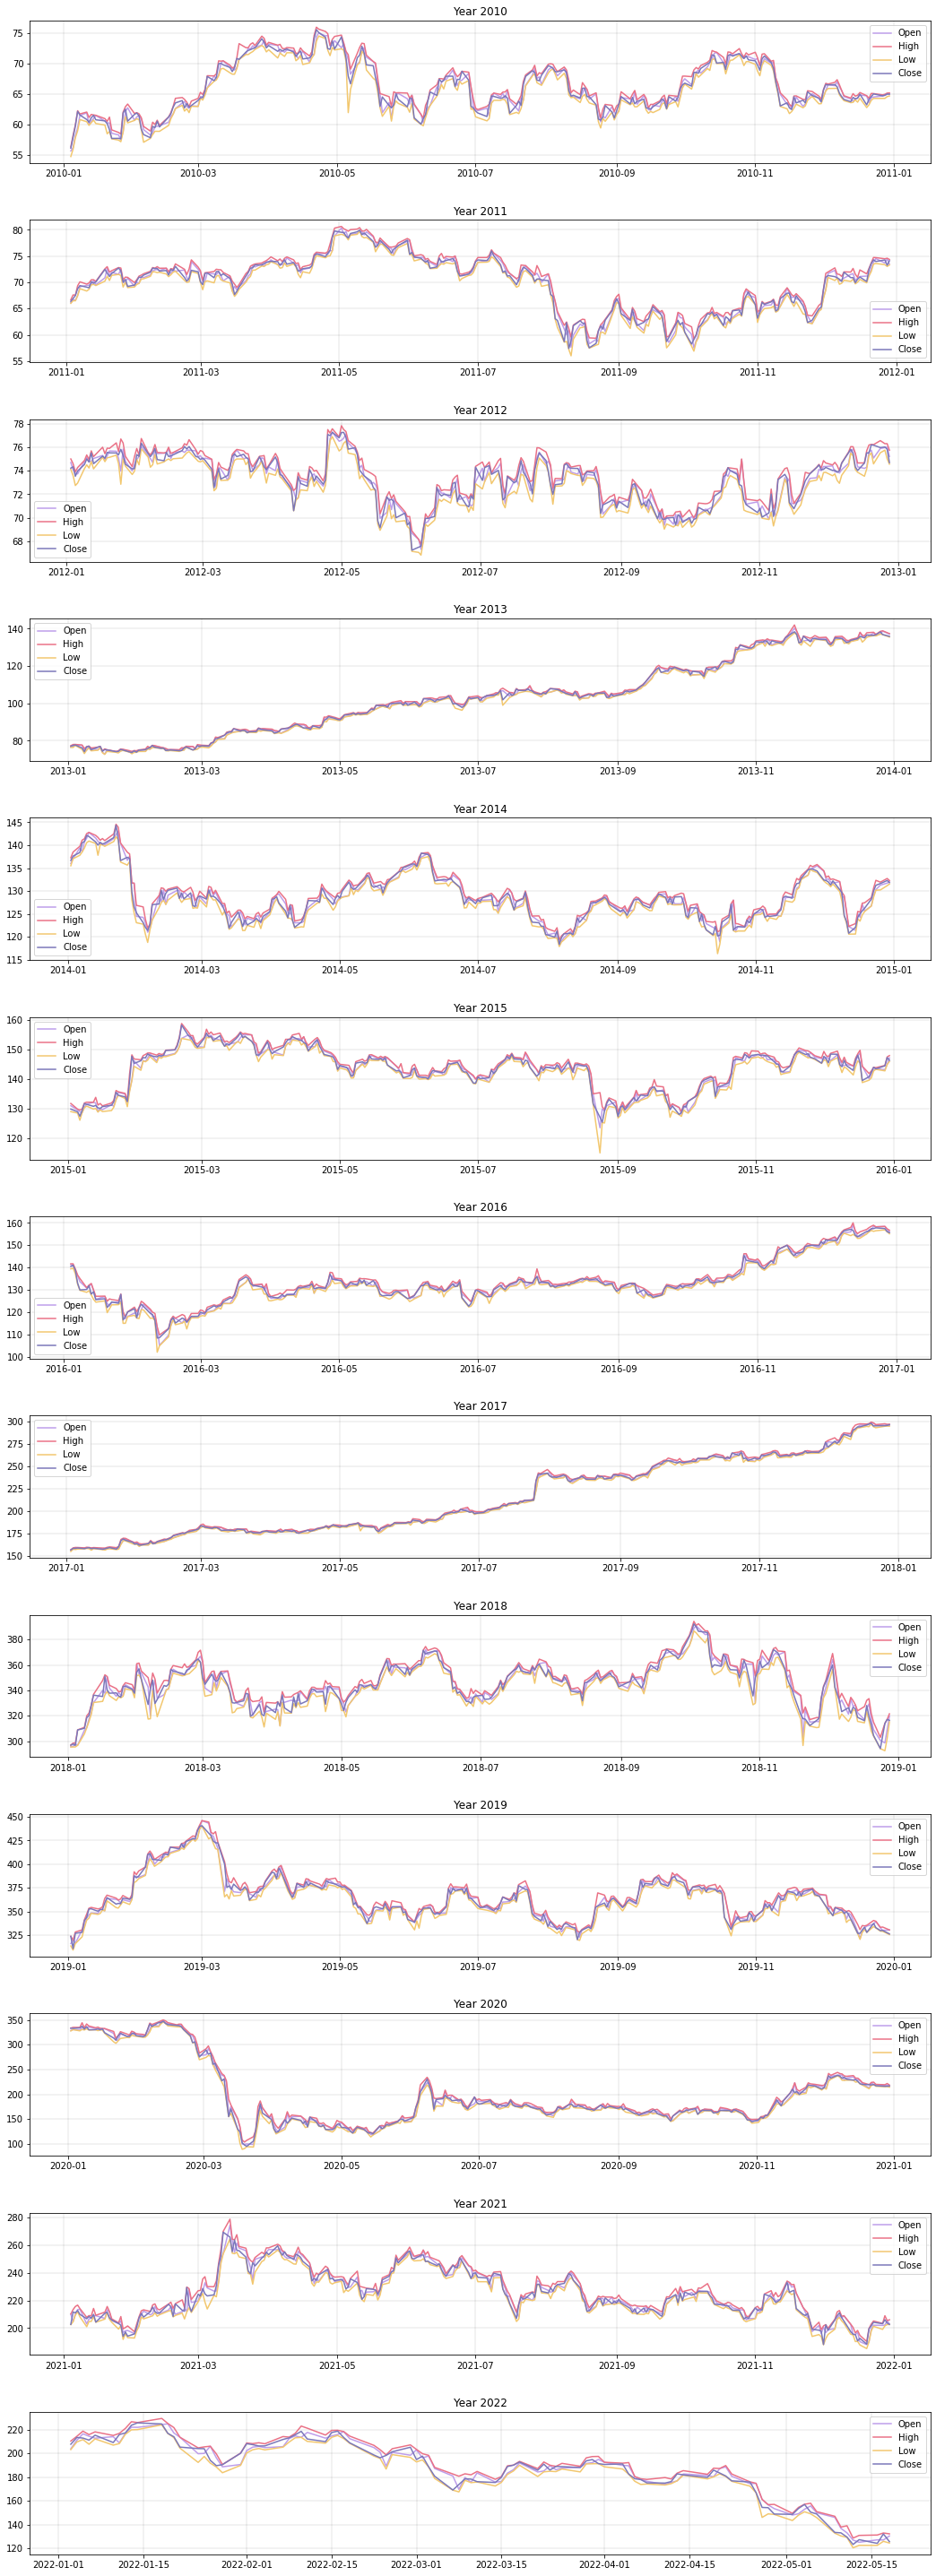

In [7]:
annual_graph(dataset_d, start_date = "01/01/2010", end_date = "05/20/2022")

In [8]:
# Create graphs for monthly stock price changes

def monthly_graph(dataset, start_date = "start", end_date = "end"):
    if start_date == "start" and end_date == "end":
        dataset = dataset
    elif start_date == "start":
        dataset = dataset[dataset.index < pd.Timestamp(end_date)]
    elif end_date == "end":
        dataset = dataset[dataset.index > pd.Timestamp(start_date)]
    else:
        dataset = dataset[(dataset.index > pd.Timestamp(start_date)) & (dataset.index < pd.Timestamp(end_date))]
    n_m = len(dataset.groupby([dataset.index.year, dataset.index.month]))
    range_start = 0
    i_m = 0
    fig, axes = plt.subplots(n_m , 1, figsize = (18, 4 * n_m))
    fig.subplots_adjust(hspace = 0.4)
    for i in range(len(dataset)):
        if i == 0:
            continue
        elif dataset.index.month[i] != dataset.index.month[i-1]:
            for price, color in zip(prices, colors):
                axes[i_m].plot(dataset.index[range_start : i - 1], dataset[price][range_start : i - 1], color = color)
            axes[i_m].set_title(str(dataset.index[i-1].month_name()) + ' ' + str(dataset.index[i-1].year))
            axes[i_m].grid(linewidth = 0.1, color = "#000000")
            axes[i_m].legend(prices)
            range_start = i
            i_m += 1
        elif i == len(dataset) - 1:
            for price, color in zip(prices, colors):
                axes[i_m].plot(dataset.index[range_start : i], dataset[price][range_start : i], color = color)
            axes[i_m].set_title(str(dataset.index[i-1].month_name()) + ' ' + str(dataset.index[i-1].year))
            axes[i_m].grid(linewidth = 0.1, color = "#000000")
            axes[i_m].legend(prices)
    plt.show()

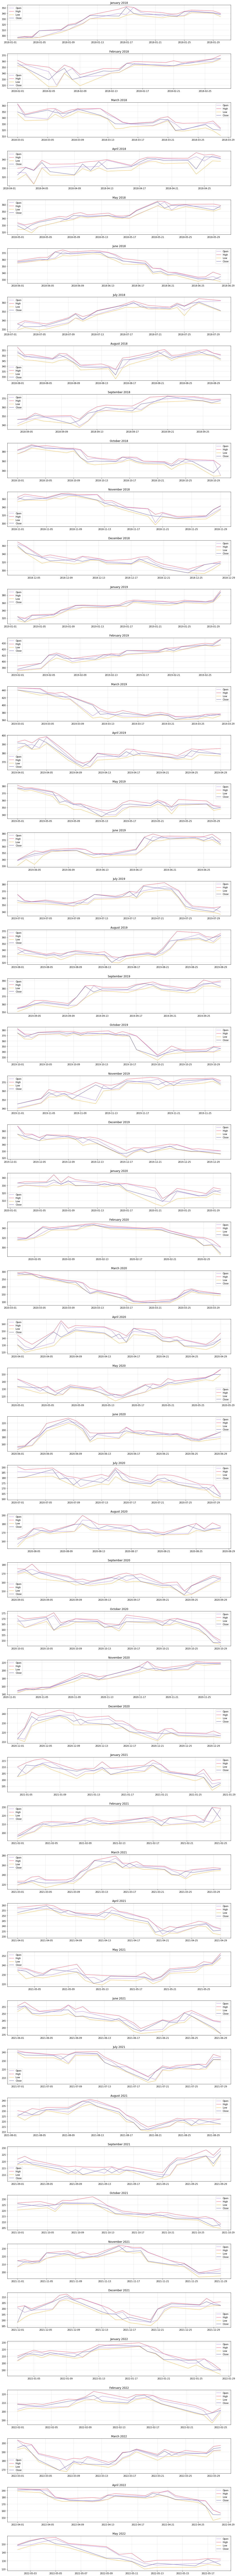

In [9]:
monthly_graph(dataset_d, start_date = "01/01/2018", end_date = "05/20/2022")

In [10]:
# Create graphs for weekly stock price changes

def weekly_graph(dataset, start_date = "start", end_date = "end"):
    if start_date == "start" and end_date == "end":
        dataset = dataset
    elif start_date == "start":
        dataset = dataset[dataset.index < pd.Timestamp(end_date)]
    elif end_date == "end":
        dataset = dataset[dataset.index > pd.Timestamp(start_date)]
    else:
        dataset = dataset[(dataset.index > pd.Timestamp(start_date)) & (dataset.index < pd.Timestamp(end_date))]
    n_w = len(dataset.groupby([dataset.index.isocalendar().week, dataset.index.year]))
    range_start = 0
    i_w = 0
    fig, axes = plt.subplots(n_w, 1, figsize = (18, 4 * n_w))
    fig.subplots_adjust(hspace=0.4)
    for i in range(len(dataset)):
        if i == 0:
            continue
        elif dataset_d.index.isocalendar().week[i] != dataset_d.index.isocalendar().week[i-1]:
            for price, color in zip(prices, colors):
                axes[i_w].plot(dataset.index[range_start : i - 1], dataset[price][range_start : i - 1], color = color)
            axes[i_w].set_title(str(dataset.index[i-1].year) + ' Week #' + str(dataset.index[i-1].isocalendar().week))
            axes[i_w].grid(linewidth = 0.1, color = "#000000")
            axes[i_w].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            axes[i_w].legend(prices)
            range_start = i
            i_w += 1
        elif i == len(dataset) - 1:
            for price, color in zip(prices, colors):
                axes[i_w].plot(dataset.index[range_start : i - 1], dataset[price][range_start : i - 1], color = color)
            axes[i_w].set_title(str(dataset.index[i-1].year) + ' Week #' + str(dataset.index[i-1].isocalendar().week))
            axes[i_w].grid(linewidth = 0.1, color = "#000000")
            axes[i_w].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            axes[i_w].legend(prices)
    plt.show()

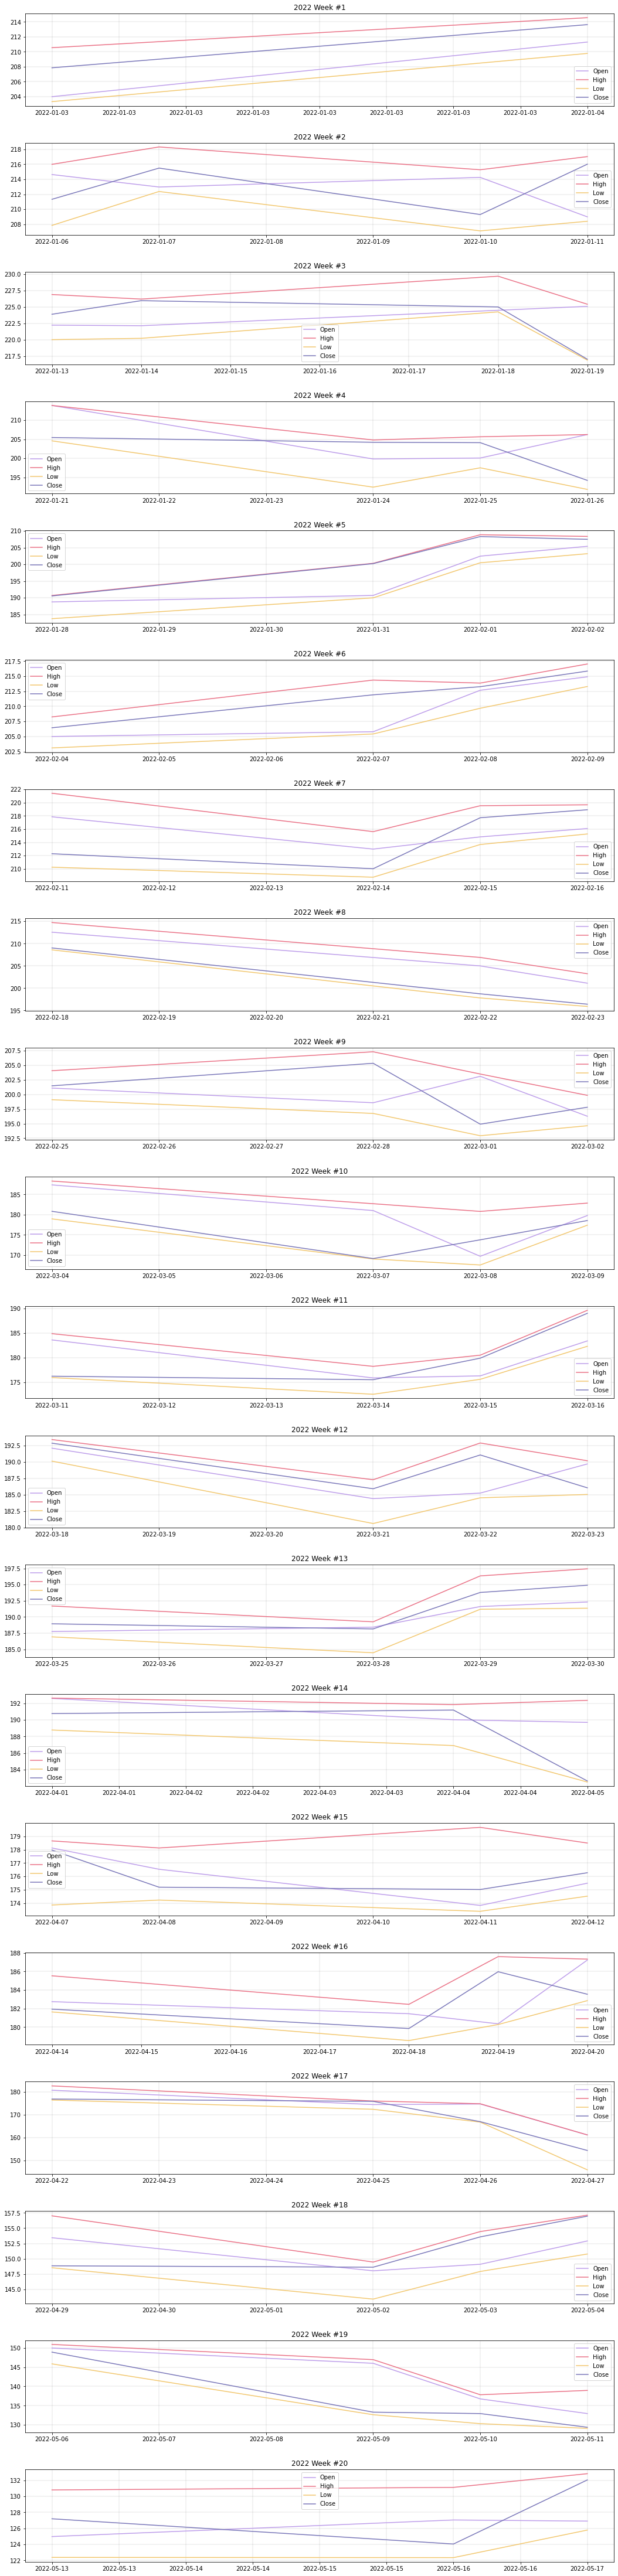

In [11]:
weekly_graph(dataset_d, start_date = "01/01/2022", end_date = "05/20/2022")